In [1]:
import os
import osmnx as ox
import networkx as nx
from graph_search import *
import networkx as nx

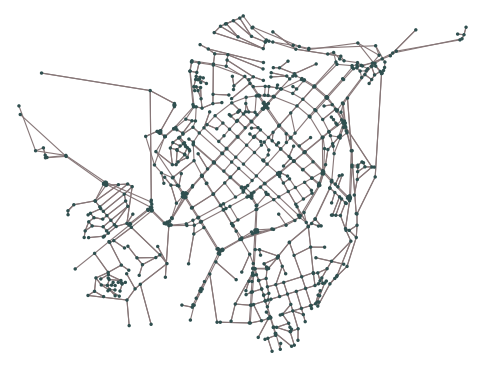

In [2]:

# ----- Build toy MultiGraph -----
PLACE = "Kentron, Yerevan, Armenia"   # small; fast for smoke tests
NETWORK = "drive"


# ---------- download (simplify=True by default here) ----------
G = ox.graph.graph_from_place(PLACE, network_type=NETWORK, simplify=True)

# keep only the largest connected component (weak is fine for roads)
G = ox.truncate.largest_component(G, strongly=False)

keep_node = {"x", "y", "street_count"}
keep_edge = {"length", "highway", "name", "maxspeed"}

for _, d in G.nodes(data=True):
    for k in list(d.keys()):
        if k not in keep_node:
            d.pop(k, None)

for u, v, k, d in G.edges(keys=True, data=True):
    for kk in list(d.keys()):
        if kk not in keep_edge:
            d.pop(kk, None)
fig, ax = ox.plot.plot_graph(
    G,
    figsize=(6, 6),
    bgcolor="white",
    node_color="#2f4f4f",
    node_size=6,
    edge_color="#877778",
    edge_linewidth=0.8,
    show=False,
    close=False,
)

In [3]:
initial = GraphState(G, 256031437)
goal_test = SimpleGoalTest(13237851232)
ucs = UCSGraphSearch()
solution = ucs.find_solution(initial, goal_test)

# ----- Print path -----
if solution:
    path = []
    node = solution
    while node:
        path.append(node.state.node_id)
        node = node.parent
    print("Solution path:", list(reversed(path)))
    print("Total cost:", solution.path_cost)
    print("Nodes expanded:", ucs.get_number_of_nodes_in_last_search())
else:
    print("No solution found.")

Solution path: [256031437, 5026483106, 5026483105, 5009318171, 10831681874, 1475774820, 1807998351, 5118314365, 10831688467, 10831688453, 5118314363, 4209742295, 4209742296, 4471795100, 960865681, 4209742306, 3086712977, 4209742311, 4209742312, 11662034200, 11601983363, 10942786777, 11648904351, 11602025272, 11602025273, 11602025274, 11602025280, 635785150, 13237851232]
Total cost: 3231.227082907712
Nodes expanded: 658


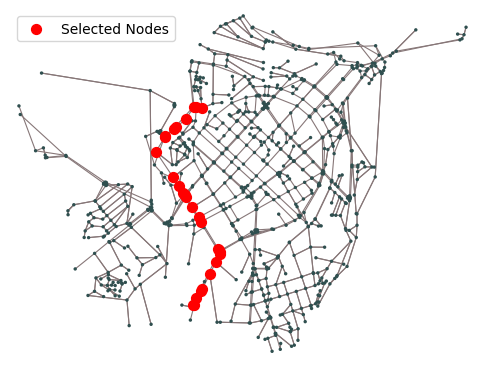

In [5]:
x_coords = [G.nodes[n]["x"] for n in path if n in G.nodes]
y_coords = [G.nodes[n]["y"] for n in path if n in G.nodes]

# replot with highlight
fig, ax = ox.plot.plot_graph(
    G,
    figsize=(6, 6),
    bgcolor="white",
    node_color="#2f4f4f",
    node_size=6,
    edge_color="#877778",
    edge_linewidth=0.8,
    show=False,
    close=False,
)

# plot the chosen nodes in red
ax.scatter(x_coords, y_coords, c="red", s=50, zorder=5, label="Selected Nodes")
ax.legend()